In [1]:
import torch
import pickle
from tqdm import tqdm
import numpy as np
import random

from sentence_transformers import models, SentenceTransformer
from sentence_transformers import InputExample
from torch.utils.data import DataLoader

import pandas as pd

In [2]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

matplotlib.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans'] 

## 1. Load Eval result

### BERT finetuned

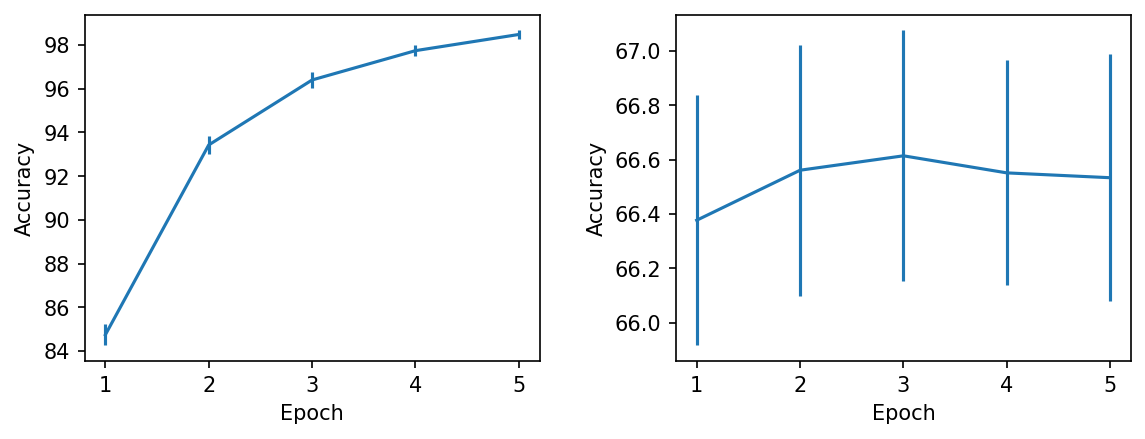

In [5]:
model_type = 'BERT'
data_type_list = ['Train', 'Test']
data_index_list = [0,1,2,3,4]

figs, axes = plt.subplots(1,2, figsize=(9,3))

acc_cos_over_epochs = {}
std_cos_over_epochs = {}
acc_euc_over_epochs = {}
std_euc_over_epochs = {}

for tid, data_type in enumerate(data_type_list):    

    acc_cos_over_epochs[data_type] = []
    std_cos_over_epochs[data_type] = []
    acc_euc_over_epochs[data_type] = []
    std_euc_over_epochs[data_type] = []
    
    for epoch in range(1,6):
        
        acc_cosine = []
        acc_euclid = []

        for data_index in data_index_list:
            filepath = '../eval/triplet_evaluation_finetuned-%s-%s_idx%d_epoch%d_results.csv'%(model_type, data_type, data_index, epoch)
            df = pd.read_csv(filepath)
            
            acc_cosine.append(df['accuracy_cosinus'][0])
            acc_euclid.append(df['accuracy_euclidean'][0])    

        acc_cos_over_epochs[data_type].append(np.mean(acc_cosine)*100)
        acc_euc_over_epochs[data_type].append(np.mean(acc_euclid)*100)
        std_cos_over_epochs[data_type].append(np.std(acc_cosine)*100)
        std_euc_over_epochs[data_type].append(np.std(acc_euclid)*100)

        #print("Model : %5s, %5s, Acc_cosine : %.2f%%, Acc_eulidean : %.2f%%"%(model_type, data_type, np.mean(acc_cosine)*100, np.mean(acc_euclid)*100))
        #print("Model : %5s, %5s, std_cosine : %.3f, std_eulidean : %.3f"%(model_type, data_type, np.std(acc_cosine)*100, np.std(acc_euclid)*100))

    axes[tid].errorbar(x=np.arange(1,6), y=acc_euc_over_epochs[data_type], yerr=std_euc_over_epochs[data_type])
    axes[tid].set_xlabel('Epoch')
    axes[tid].set_ylabel('Accuracy')

plt.subplots_adjust(wspace=0.3)
plt.savefig('../fig/Triplet_loss_(BERT).pdf', transparent=True, bbox_inches='tight')
    

In [10]:
print("%.3f"%acc_euc_over_epochs['Train'][2])
print("%.3f"%std_euc_over_epochs['Train'][2])

print("%.3f"%acc_euc_over_epochs['Test'][2])
print("%.3f"%std_euc_over_epochs['Test'][2])

96.404
0.350
66.614
0.461


## roberta-base-nli-stsb-mean-tokens

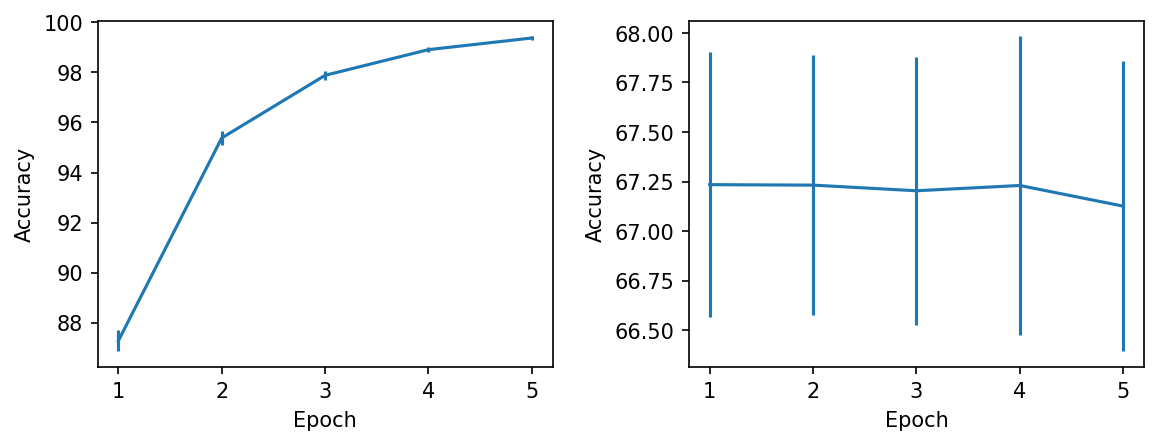

In [11]:
data_type_list = ['Train', 'Test']
data_index_list = [0,1,2,3,4]

figs, axes = plt.subplots(1,2, figsize=(9,3))

acc_cos_over_epochs_sb = {}
std_cos_over_epochs_sb = {}
acc_euc_over_epochs_sb = {}
std_euc_over_epochs_sb = {}

for tid, data_type in enumerate(data_type_list):

    acc_cos_over_epochs_sb[data_type] = []
    std_cos_over_epochs_sb[data_type] = []
    acc_euc_over_epochs_sb[data_type] = []
    std_euc_over_epochs_sb[data_type] = []
    
    for epoch in range(1,6):
        
        acc_cosine = []
        acc_euclid = []

        for data_index in data_index_list:
            filepath = '../eval/triplet_evaluation_roberta-base-%s_idx%d_epoch%d_results.csv'%(data_type, data_index, epoch)
            df = pd.read_csv(filepath)
            
            acc_cosine.append(df['accuracy_cosinus'][0])
            acc_euclid.append(df['accuracy_euclidean'][0])    

        acc_cos_over_epochs_sb[data_type].append(np.mean(acc_cosine)*100)
        acc_euc_over_epochs_sb[data_type].append(np.mean(acc_euclid)*100)
        std_cos_over_epochs_sb[data_type].append(np.std(acc_cosine)*100)
        std_euc_over_epochs_sb[data_type].append(np.std(acc_euclid)*100)

        #print("Model : %5s, %5s, Acc_cosine : %.2f%%, Acc_eulidean : %.2f%%"%(model_type, data_type, np.mean(acc_cosine)*100, np.mean(acc_euclid)*100))
        #print("Model : %5s, %5s, std_cosine : %.3f, std_eulidean : %.3f"%(model_type, data_type, np.std(acc_cosine)*100, np.std(acc_euclid)*100))

    axes[tid].errorbar(x=np.arange(1,6), y=acc_euc_over_epochs_sb[data_type], yerr=std_euc_over_epochs_sb[data_type])
    axes[tid].set_xlabel('Epoch')
    axes[tid].set_ylabel('Accuracy')

plt.subplots_adjust(wspace=0.3)
plt.savefig('../fig/Triplet_loss_(S-BERT).pdf', transparent=True, bbox_inches='tight')


In [13]:
print("%.3f"%acc_euc_over_epochs_sb['Train'][2])
print("%.3f"%std_euc_over_epochs_sb['Train'][2])
print("%.3f"%acc_euc_over_epochs_sb['Test'][2])
print("%.3f"%std_euc_over_epochs_sb['Test'][2])

97.884
0.180
67.204
0.675


### original bert and sbert

In [14]:
model_type = 'base BERT'
data_type_list = ['trainset', 'testset']
data_index_list = [0,1,2,3,4]

acc_cos_over_epochs_base_bert = {}
std_cos_over_epochs_base_bert = {}
acc_euc_over_epochs_base_bert = {}
std_euc_over_epochs_base_bert = {}

for tid, data_type in enumerate(data_type_list):    

    acc_cos_over_epochs_base_bert[data_type] = []
    std_cos_over_epochs_base_bert[data_type] = []
    acc_euc_over_epochs_base_bert[data_type] = []
    std_euc_over_epochs_base_bert[data_type] = []
    
    acc_cosine = []
    acc_euclid = []

    for data_index in data_index_list:
        filepath = '../eval/triplet_evaluation_bert_untrained_(%s)_idx%d_results.csv'%(data_type, data_index)
        df = pd.read_csv(filepath)
        
        acc_cosine.append(df['accuracy_cosinus'][0])
        acc_euclid.append(df['accuracy_euclidean'][0])    

    acc_cos_over_epochs_base_bert[data_type].append(np.mean(acc_cosine)*100)
    acc_euc_over_epochs_base_bert[data_type].append(np.mean(acc_euclid)*100)
    std_cos_over_epochs_base_bert[data_type].append(np.std(acc_cosine)*100)
    std_euc_over_epochs_base_bert[data_type].append(np.std(acc_euclid)*100)

        #print("Model : %5s, %5s, Acc_cosine : %.2f%%, Acc_eulidean : %.2f%%"%(model_type, data_type, np.mean(acc_cosine)*100, np.mean(acc_euclid)*100))
        #print("Model : %5s, %5s, std_cosine : %.3f, std_eulidean : %.3f"%(model_type, data_type, np.std(acc_cosine)*100, np.std(acc_euclid)*100))

print(acc_cos_over_epochs_base_bert)

{'trainset': [37.7008], 'testset': [35.907799999999995]}


In [17]:
print("%.3f"%acc_euc_over_epochs_base_bert['trainset'][0])
print("%.3f"%std_euc_over_epochs_base_bert['trainset'][0])
print("%.3f"%acc_euc_over_epochs_base_bert['testset'][0])
print("%.3f"%std_euc_over_epochs_base_bert['testset'][0])

37.669
0.212
35.890
0.774


In [18]:
model_type = 'roberta-base'
data_type_list = ['trainset', 'testset']
data_index_list = [0,1,2,3,4]

acc_cos_over_epochs_base_sbert = {}
std_cos_over_epochs_base_sbert = {}
acc_euc_over_epochs_base_sbert = {}
std_euc_over_epochs_base_sbert = {}

for tid, data_type in enumerate(data_type_list):    

    acc_cos_over_epochs_base_sbert[data_type] = []
    std_cos_over_epochs_base_sbert[data_type] = []
    acc_euc_over_epochs_base_sbert[data_type] = []
    std_euc_over_epochs_base_sbert[data_type] = []
    
    acc_cosine = []
    acc_euclid = []

    for data_index in data_index_list:
        filepath = '../eval/triplet_evaluation_roberta-base_untrained_(%s)idx%d_results.csv'%(data_type, data_index)
        df = pd.read_csv(filepath)
        
        acc_cosine.append(df['accuracy_cosinus'][0])
        acc_euclid.append(df['accuracy_euclidean'][0])    

    acc_cos_over_epochs_base_sbert[data_type].append(np.mean(acc_cosine)*100)
    acc_euc_over_epochs_base_sbert[data_type].append(np.mean(acc_euclid)*100)
    std_cos_over_epochs_base_sbert[data_type].append(np.std(acc_cosine)*100)
    std_euc_over_epochs_base_sbert[data_type].append(np.std(acc_euclid)*100)

        #print("Model : %5s, %5s, Acc_cosine : %.2f%%, Acc_eulidean : %.2f%%"%(model_type, data_type, np.mean(acc_cosine)*100, np.mean(acc_euclid)*100))
        #print("Model : %5s, %5s, std_cosine : %.3f, std_eulidean : %.3f"%(model_type, data_type, np.std(acc_cosine)*100, np.std(acc_euclid)*100))

print(acc_cos_over_epochs_base_sbert)

{'trainset': [39.83519999999999], 'testset': [38.1918]}


In [19]:
print("%.3f"%acc_euc_over_epochs_base_sbert['trainset'][0])
print("%.3f"%std_euc_over_epochs_base_sbert['trainset'][0])
print("%.3f"%acc_euc_over_epochs_base_sbert['testset'][0])
print("%.3f"%std_euc_over_epochs_base_sbert['testset'][0])

39.832
0.194
38.111
1.010


## Aggregated graph

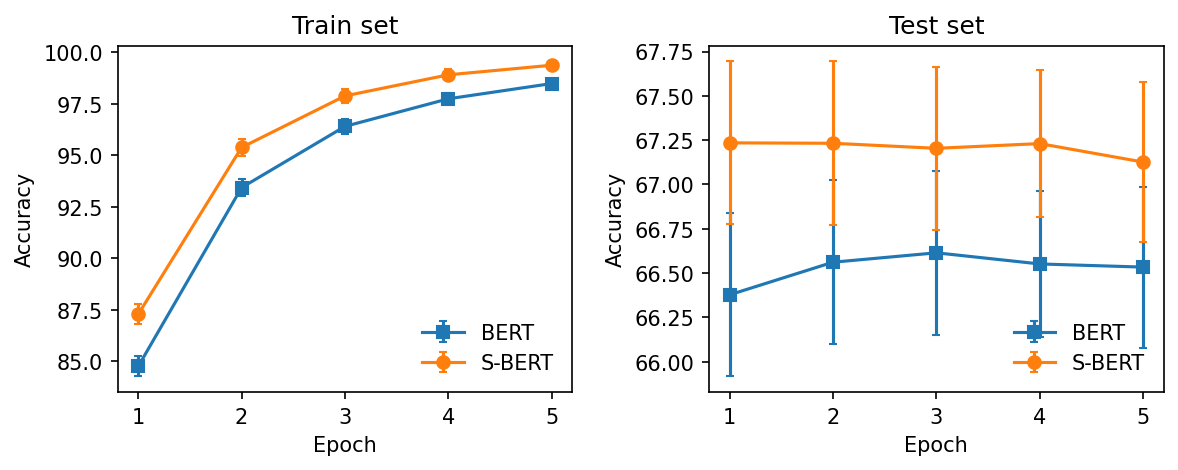

In [105]:
figs, axes = plt.subplots(1,2, figsize=(9,3))

ax1 = axes[0]
ax1.errorbar(np.arange(1,6), acc_euc_over_epochs['Train'], std_euc_over_epochs['Train'], fmt='s-', capsize=2, label='BERT')
ax1.errorbar(np.arange(1,6), acc_euc_over_epochs_sb['Train'], std_euc_over_epochs['Train'], fmt='o-', capsize=2, label='S-BERT')
#ax1.axhline(acc_euc_over_epochs_base_bert['trainset'][0], ls='--')
#ax1.axhline(acc_euc_over_epochs_base_sbert['trainset'][0], ls='--', color='orange')
ax1.legend(frameon=False, loc=4)
ax1.set_title('Train set')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')


ax2 = axes[1]
ax2.errorbar(np.arange(1,6), acc_euc_over_epochs['Test'], std_euc_over_epochs['Test'], fmt='s-', capsize=2, label='BERT')
ax2.errorbar(np.arange(1,6), acc_euc_over_epochs_sb['Test'], std_euc_over_epochs['Test'], fmt='o-', capsize=2, label='S-BERT')
#ax2.axhline(acc_euc_over_epochs_base_bert['testset'][0], ls='--')
#ax2.axhline(acc_euc_over_epochs_base_sbert['testset'][0], ls='--', color='orange')
#ax2.set_ylim(65,68)
ax2.set_title('Test set')
ax2.legend(frameon=False, loc=4)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')

plt.subplots_adjust(wspace=0.3)
plt.savefig('../fig/Triplet_loss_(BERT_vs_S-BERT).pdf', transparent=True, bbox_inches='tight')

In [90]:
acc_euc_over_epochs_sb

{'Train': [87.27499999999999,
  95.38040000000001,
  97.88399999999999,
  98.90979999999999,
  99.3752],
 'Test': [67.2346, 67.23219999999999, 67.20379999999999, 67.2304, 67.1262]}

In [91]:
acc_euc_over_epochs

{'Train': [84.7428,
  93.42979999999999,
  96.40359999999998,
  97.74480000000001,
  98.4854],
 'Test': [66.377, 66.561, 66.614, 66.5512, 66.5334]}

In [96]:
acc_cos_over_epochs_base_bert

{'trainset': [37.7008], 'testset': [35.907799999999995]}

In [93]:
acc_cos_over_epochs_base_sbert

{'trainset': [39.83519999999999], 'testset': [38.1918]}